This dataset contains the customers details of the bank and here the target variable is in binary form stating that the customer has left the bank or he continues to be the customer

Importing the important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

Importing the dataset

In [6]:
data = pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# check the shape of the data
data.shape

(10000, 14)

Here we have details of the 10k customers into 14 columns.

We can clearly make out from the dataset that the columns RowNumber, CustomerId and Surname does not have any correlation with the dataset. So we will drop that first.

We will now divide the dataset into dependent and independent dataset , also the 'Exited' column is our dependent variable which we will  drop that to.


In [8]:
# independent variable
X=data.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
#dependent variable
y=data['Exited']

# checking the shape of the data
X.shape, y.shape

((10000, 10), (10000,))

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


We can see that from our dataset that , our Geography and gender columns contains the categorical values, we will need to encode the data

In [11]:
# import the encoder
from sklearn.preprocessing import LabelEncoder

In [12]:
# inputing the labelencoder into a variable 'label1'
label1 = LabelEncoder()

In [13]:
# transforming the geography column of the dataset
X['Geography']=label1.fit_transform(X['Geography'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
# transforming the Gender column of the dataset
X['Gender']=label1.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


Here we converted the string into numerical values for the Gender and Geography dataset, but as it is a categorical value it doest mean the value '2' to is greater than '1' or its greater than '0'. So in order to give equal importance to the categorical values we will convert the values by Onehotencoding or by getdummies

In [16]:
X=pd.get_dummies(X,drop_first=True,columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


Here we used the getdummies library on X data and the column we used on is Geography, but take notice that we used drop_first=True, this will drop one column from geopgraphy after creating dummy columns to reduce the redundancy.

Also we did not use the get dummies on Gender columns as they are already of the value 0 and 1 only unlike Geography had 0,1,2

Now we will divide our data into training and testing data

In [18]:
# dividing the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99,stratify=y)

# checking the shape of the training and testing data
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((8000, 11), (2000, 11), (8000,), (2000,))

In [19]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
1913,757,1,30,6,105128.85,2,1,1,62972.13,1,0
183,636,1,42,2,0.00,2,1,1,55470.78,0,0
6719,650,0,39,4,0.00,2,0,0,186275.70,0,0
7299,661,1,51,6,146606.60,1,1,1,68021.90,0,0
3740,649,1,45,7,0.00,2,0,1,75204.21,0,0


We can see that our data is varied in a long range, so we need to scale the data in a specific range.

We will use Standard Scaler to scale the data here

In [20]:
# importing the standard scaler
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
# scaling the training data
X_train=scaler.fit_transform(X_train)
# scaling the testing data
X_test=scaler.fit_transform(X_test)

# check
X_train

array([[ 1.10465735,  0.90727838, -0.85042047, ..., -0.64615156,
         1.72115008, -0.56965192],
       [-0.1480043 ,  0.90727838,  0.28888519, ..., -0.77650024,
        -0.58100686, -0.56965192],
       [-0.00306824, -1.10219754,  0.00405878, ...,  1.49645714,
        -0.58100686, -0.56965192],
       ...,
       [ 1.45664492, -1.10219754,  0.28888519, ...,  0.69141183,
         1.72115008, -0.56965192],
       [-0.26188264,  0.90727838, -0.75547833, ..., -1.73883402,
        -0.58100686, -0.56965192],
       [-0.24117748, -1.10219754, -0.37570978, ...,  1.52152407,
        -0.58100686,  1.75545796]])

Now our data is preprocessed properlly we will build the model

In [42]:
# import model
model=Sequential()
# import layers
model.add(Dense(X.shape[1],activation='relu',input_dim=X.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Here we added the no neurons we want to run as the no features in our X dataset and input dimension(11) which is equal to 11 * 11 also we gave the same no of features. this is for the first input layer

then for the second layer which is our only hidden layer we are giving 128 no of neurons with relu activation

then for the third layer which is our output layer we are 1 as the value as the output will contain 0 or 1 and so the activation associated with the binary is sigmoid

In [43]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
y_train=y_train.values
y_train
y_test=y_test.values
y_test

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Here our y_train was in a series format so we converted the same into an array like X_train

In [45]:
%%time
# fitting the model
history=model.fit(X_train,y_train,batch_size=10,epochs=20)

Train on 8000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 187us/sample - loss: 0.4454 - accuracy: 0.8123
Epoch 2/20
8000/8000 [==============================] - 1s 149us/sample - loss: 0.3785 - accuracy: 0.8453
Epoch 3/20
8000/8000 [==============================] - 1s 148us/sample - loss: 0.3564 - accuracy: 0.8544
Epoch 4/20
8000/8000 [==============================] - 1s 148us/sample - loss: 0.3486 - accuracy: 0.8554
Epoch 5/20
8000/8000 [==============================] - 1s 148us/sample - loss: 0.3438 - accuracy: 0.8571
Epoch 6/20
8000/8000 [==============================] - 1s 151us/sample - loss: 0.3404 - accuracy: 0.8602
Epoch 7/20
8000/8000 [==============================] - 1s 147us/sample - loss: 0.3388 - accuracy: 0.8614
Epoch 8/20
8000/8000 [==============================] - 1s 148us/sample - loss: 0.3369 - accuracy: 0.8615
Epoch 9/20
8000/8000 [==============================] - 1s 148us/sample - loss: 0.3346 - accuracy: 0.8633
Epoch 10/20
8000/8000 [=

Here batch size specifies the no of inputs we want to evaluate a weight, for example here for every 10 inputs our weights will get updated.

Note: if the batch size is 1 then for every input the weights will get updated, which is not feasible If the batch size is equal to the size of the total data(rows) then the stochastic gradient will become kind of batch gradient

In [46]:
# prediction
y_pred=model.predict_classes(X_test)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [47]:
# check the accuracy
x_loss,x_acc=model.evaluate(X_test,y_test)
print(x_loss,x_acc)

2000/2000 [==============================] - 0s 72us/sample - loss: 0.3357 - accuracy: 0.8580
0.3357073836326599 0.858


Checking the accuracy score by using the confusion matrix,accuracy score

In [48]:
# import the libraries
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
# accuracy score
confusion_matrix(y_test,y_pred)

array([[1531,   62],
       [ 222,  185]])

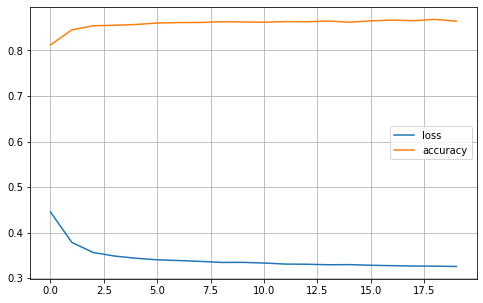

In [50]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()